In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

df = pd.read_csv("assets/housedata.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [2]:
x = df.drop(["price","date","street","city","country","statezip"],axis=1)
y = df["price"]
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [3]:
# univariate extraction of the features with the highest correlation
correlations = x.corrwith(y) 
corr_feature_1 = correlations.idxmax() 
corr_value_1 = correlations.max() 

correlations = x.corrwith(y).sort_values(ascending=False)
corr_feature_2 = correlations.index[1]
corr_value_2 = correlations.iloc[1]
corr_feature_3 = correlations.index[2]
corr_value_3 = correlations.iloc[2]

print("The top 3 with highest correlations in order:", corr_feature_1, corr_feature_2, corr_feature_3)
print("Their values respectively:", corr_value_1, corr_value_2, corr_value_3)

The top 3 with highest correlations in order: sqft_living sqft_above bathrooms
Their values respectively: 0.43041002543262824 0.3675696016004262 0.3271099182877351


In [4]:
# multivariate extraction of the features from a probability value
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

significant_features = model.pvalues[model.pvalues <= 0.000].index
print("Significant features with p-value <= 0.000:", significant_features)

# increase original threashold by 0.00000000000000000000001
significant_features = model.pvalues[model.pvalues <= (1 * 10**-23)].index
print(f"Significant features with p-value <= {(1 * 10**-23)}:", significant_features)

# increase original threashold by 0.000000000001
significant_features = model.pvalues[model.pvalues <= (1 * 10**-12)].index
print(f"Significant features with p-value <= {(1 * 10**-12)}:", significant_features)

# increase original threashold by 0.00000000001
significant_features = model.pvalues[model.pvalues <= (1 * 10**-11)].index
print(f"Significant features with p-value <= {(1 * 10**-11)}:", significant_features)

Significant features with p-value <= 0.000: Index([], dtype='object')
Significant features with p-value <= 1e-23: Index(['sqft_living'], dtype='object')
Significant features with p-value <= 1e-12: Index(['sqft_living', 'sqft_above'], dtype='object')
Significant features with p-value <= 1e-11: Index(['sqft_living', 'sqft_above', 'yr_built'], dtype='object')


Mean Absolute Error 193192.20832324284
Mean Squared Error 824487044764.3873
R Mean Squared Error 908012.689759558
R Squared 0.056137345416807816


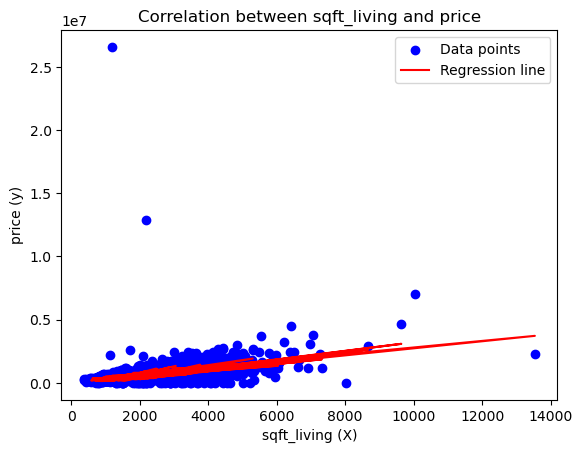

In [5]:
x_to_correlate = 'sqft_living'
X_train, X_test, y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state=2)
model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 
r_squared = r2_score(y_test, predictions) 

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("R Mean Squared Error", rmse)
print("R Squared", r_squared)

plt.scatter(x[x_to_correlate],y,color='blue',label = 'Data points')
plt.plot(X_test[x_to_correlate], predictions , color = 'red', label = 'Regression line')
plt.xlabel(f'{x_to_correlate} (X)')
plt.ylabel('price (y)')
plt.title(f'Correlation between {x_to_correlate} and price')
plt.legend()
plt.show()